## FSA v0.9.4. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.


Attaching package: 'psych'


The following object is masked from 'package:FSA':

    headtail


Warning message:
"package 'knitr' was built under R version 4.2.3"

Attaching package: 'rcompanion'


The following object is masked from 'package:psych':

    phi



Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha






Table: Summary

|Lot     |n     |min   |max   |range          |median |mean  |sd   |
|:-------|:-----|:-----|:-----|:--------------|:------|:-----|:----|
|Control |21039 |12.93 |49.57 |12.932, 49.570 |27.81  |28.02 |2.08 |
|Exp 1   |42479 |4.26  |49.31 |4.258, 49.307  |26.24  |26.46 |2.09 |
|Exp 2   |46350 |12.64 |54.79 |12.644, 54.794 |26.06  |26.19 |2.02 |
|Exp 3   |44311 |4.32  |49.69 |4.315, 49.690  |25.40  |25.57 |1.88 |
|Exp 4   |45805 |13.49 |55.90 |13.495, 55.897 |26.46  |26.57 |1.93 |
|Exp 5   |44700 |13.27 |49.98 |13.269, 49.982 |25.33  |25.52 |1.95 |

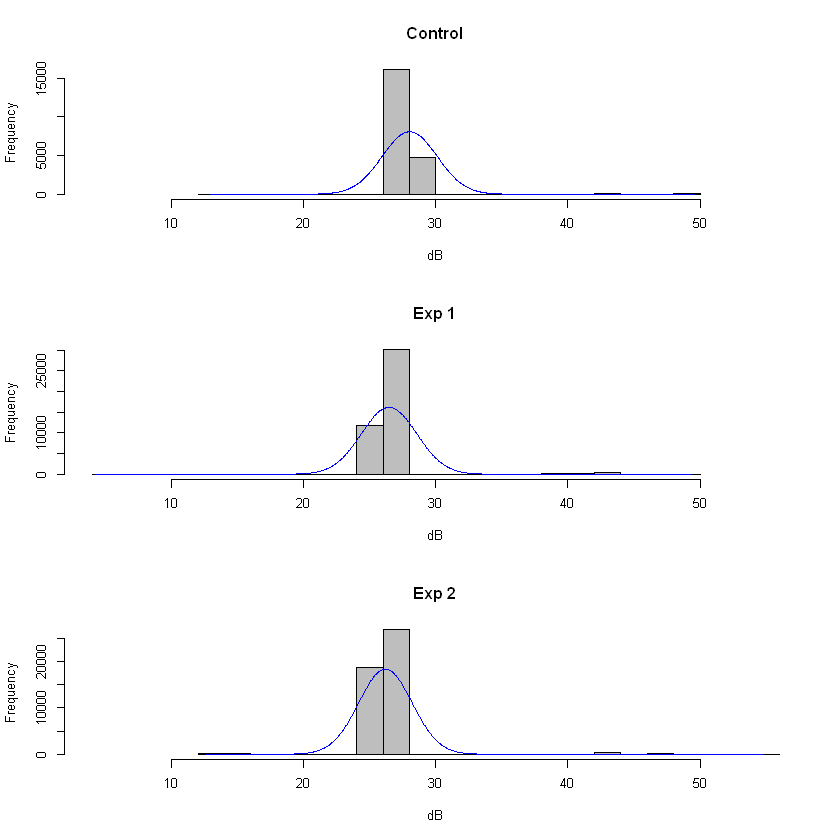

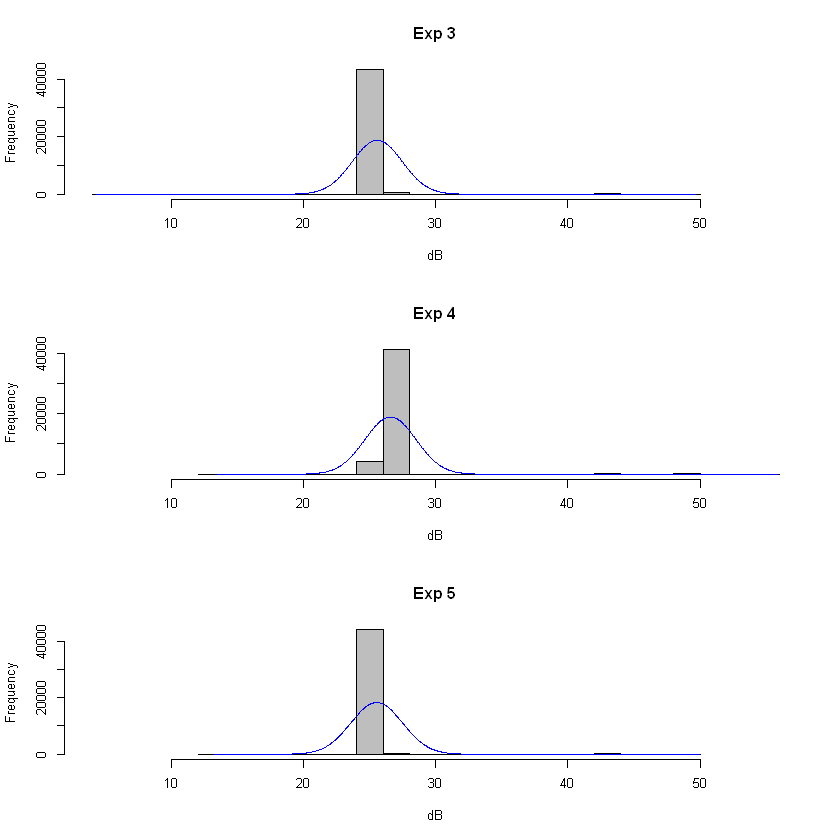

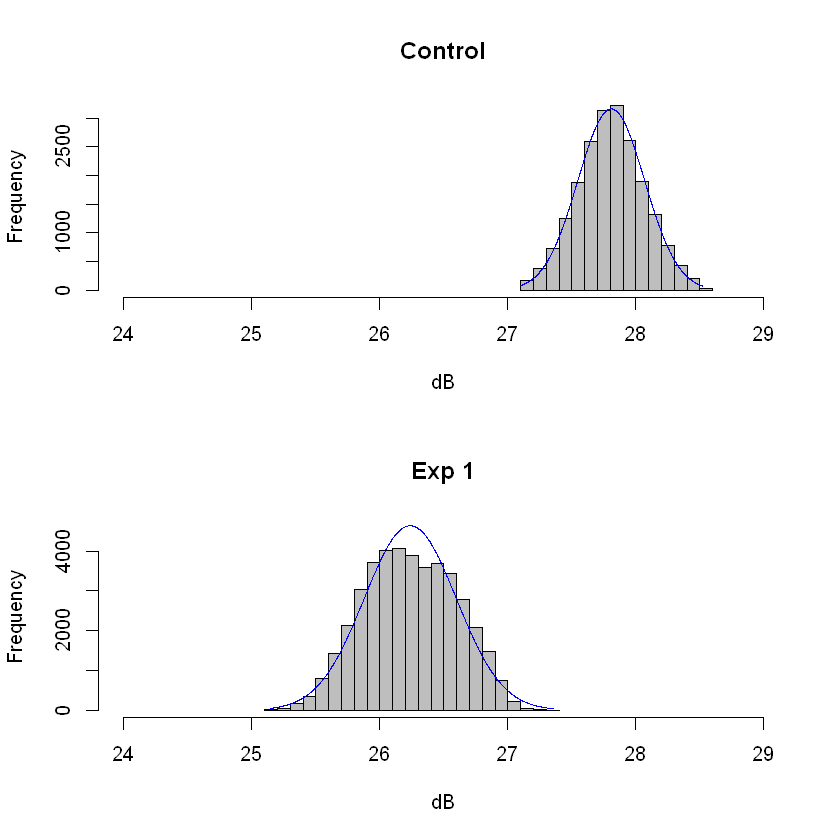

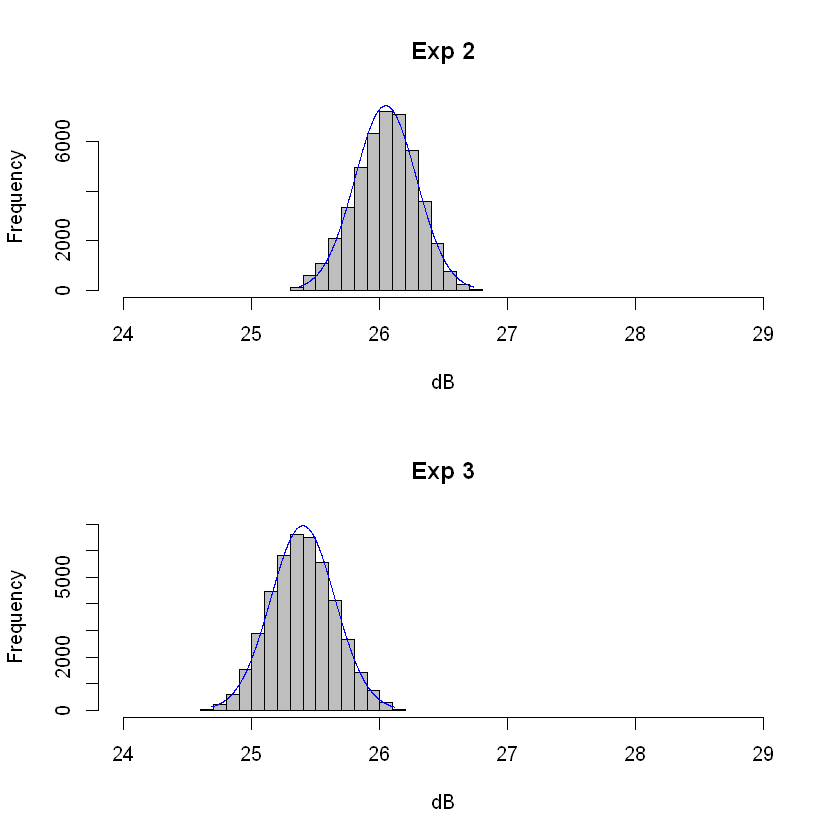

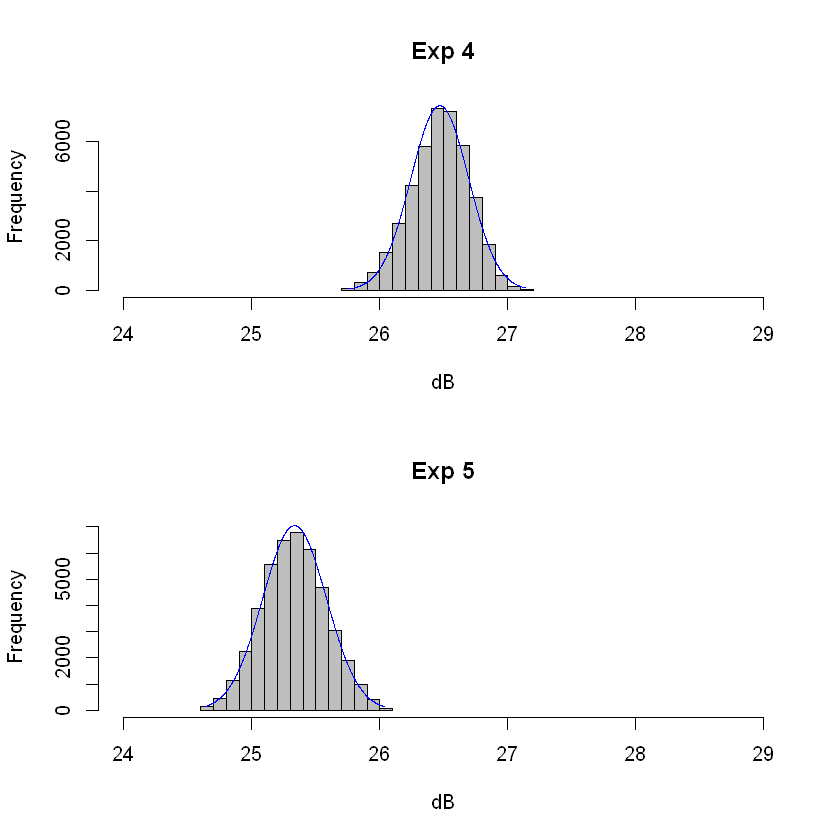

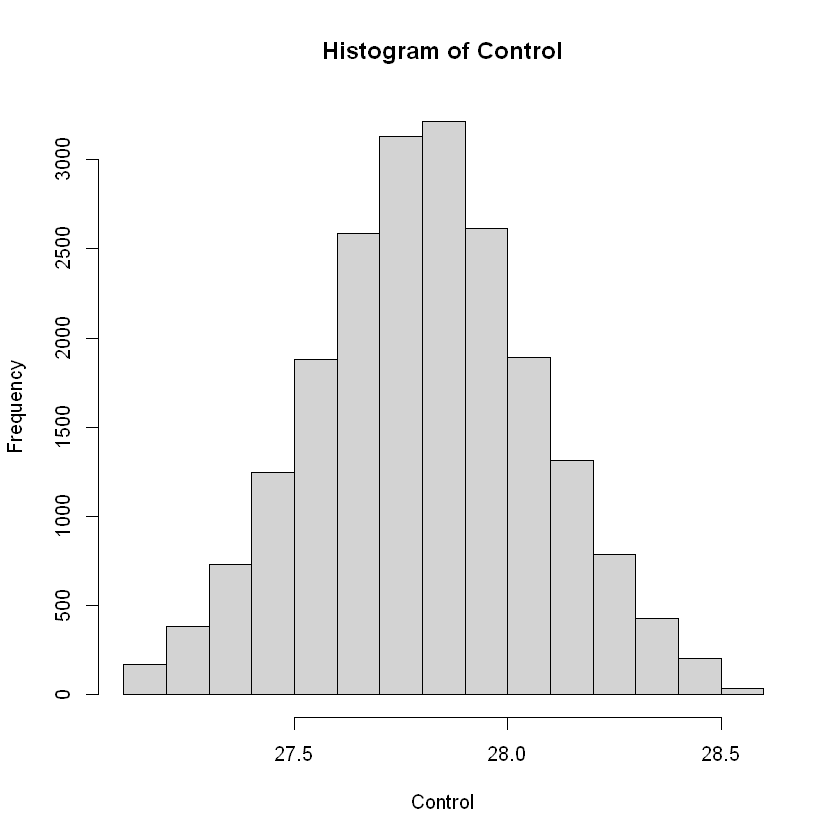

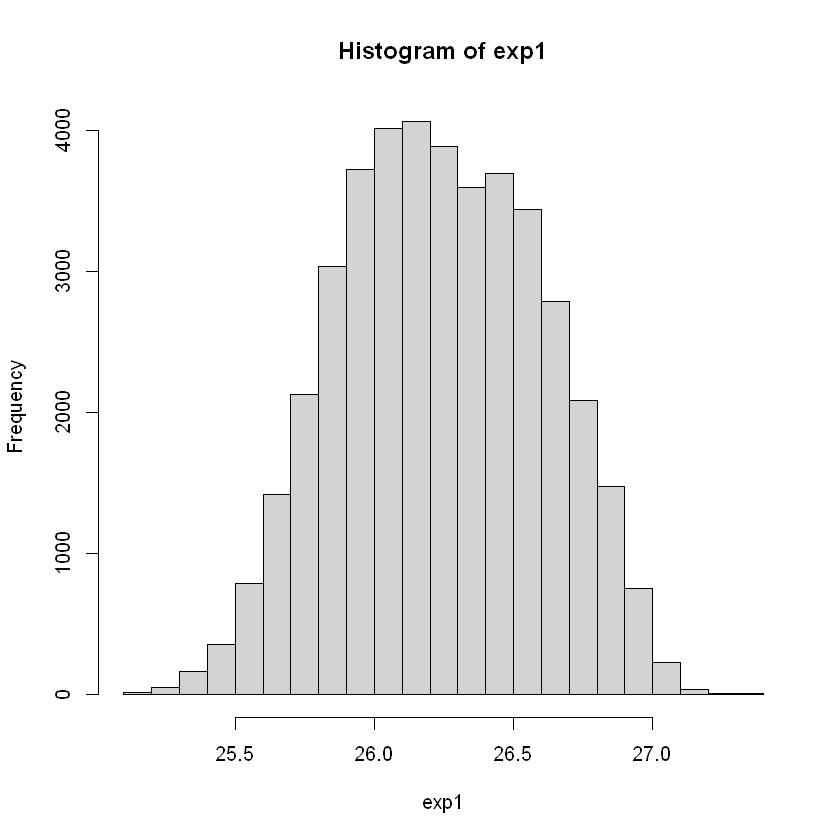

Warning message in plot.window(xlim, ylim, "", ...):
""breaks" is not a graphical parameter"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""breaks" is not a graphical parameter"
Warning message in axis(1, ...):
""breaks" is not a graphical parameter"
Warning message in axis(2, at = yt, ...):
""breaks" is not a graphical parameter"


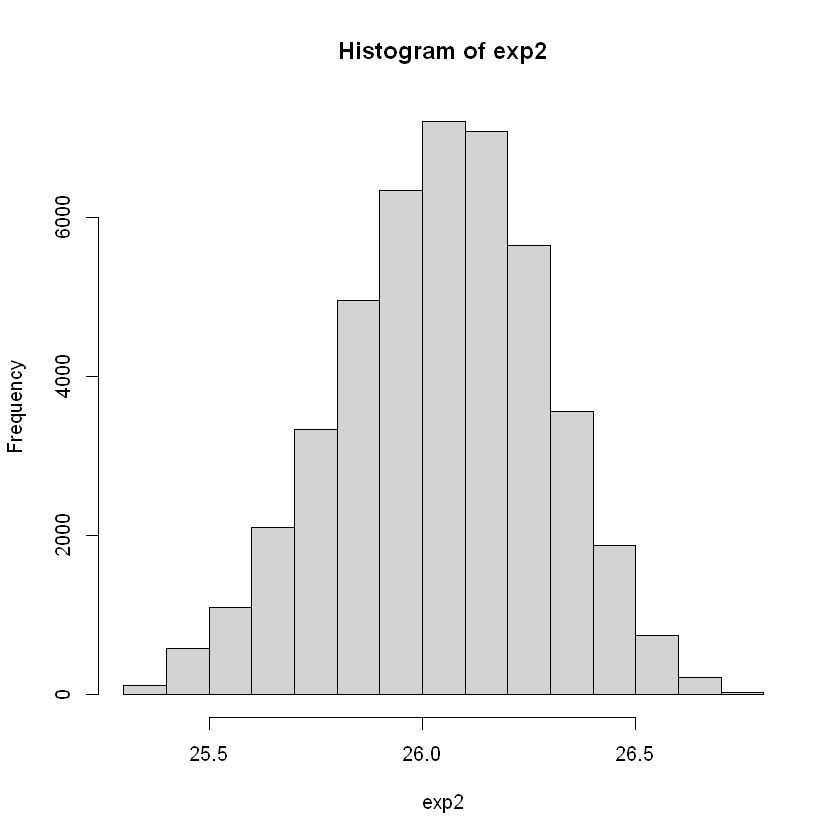

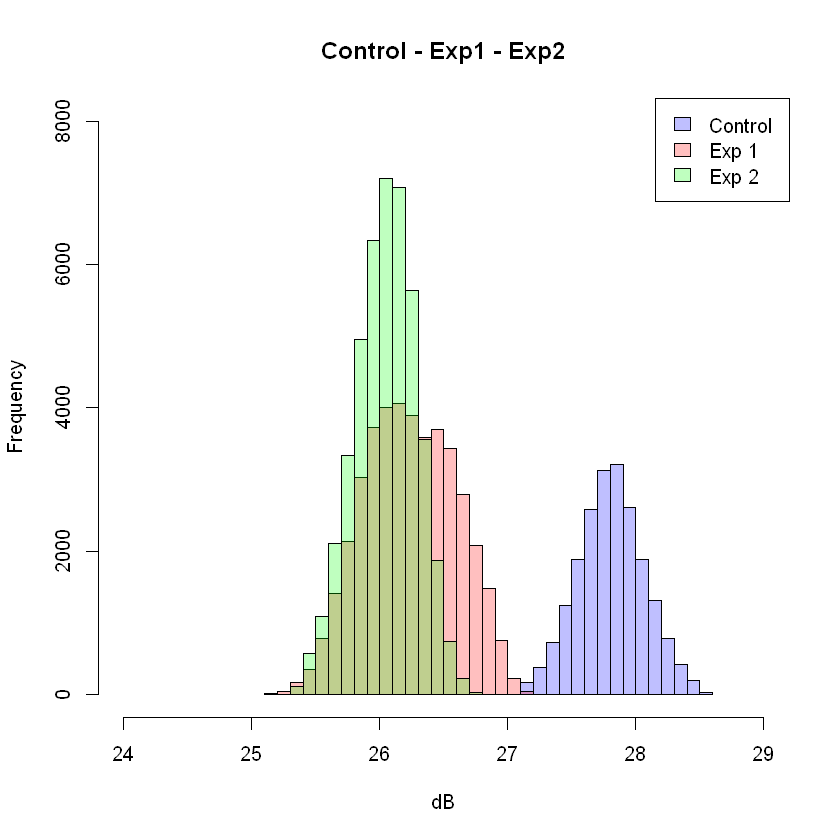

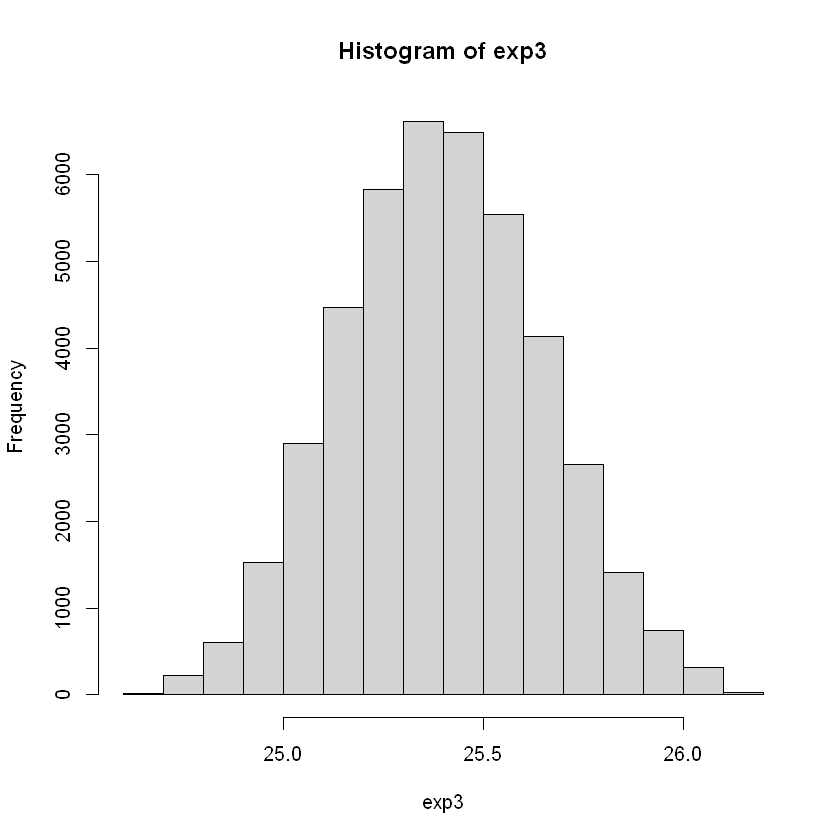

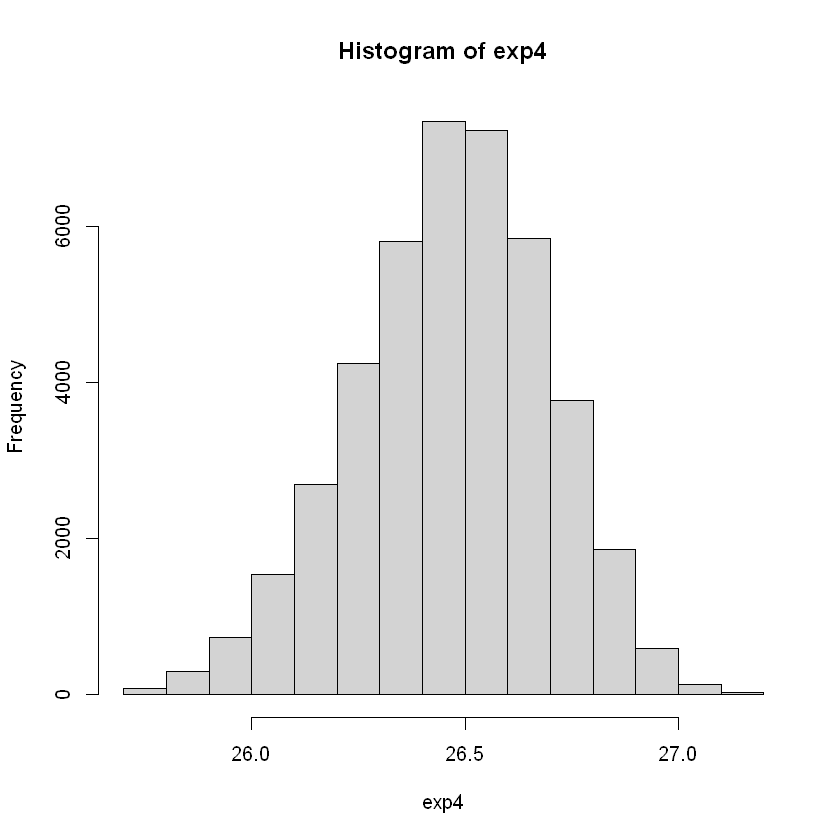

Warning message in plot.window(xlim, ylim, "", ...):
""breaks" is not a graphical parameter"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""breaks" is not a graphical parameter"
Warning message in axis(1, ...):
""breaks" is not a graphical parameter"
Warning message in axis(2, at = yt, ...):
""breaks" is not a graphical parameter"


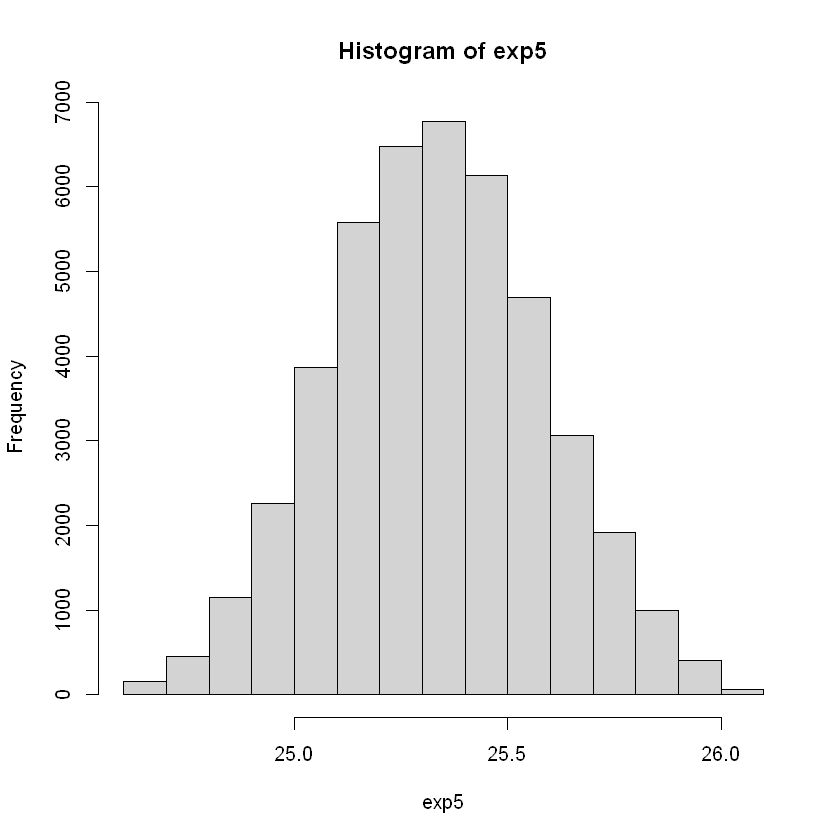

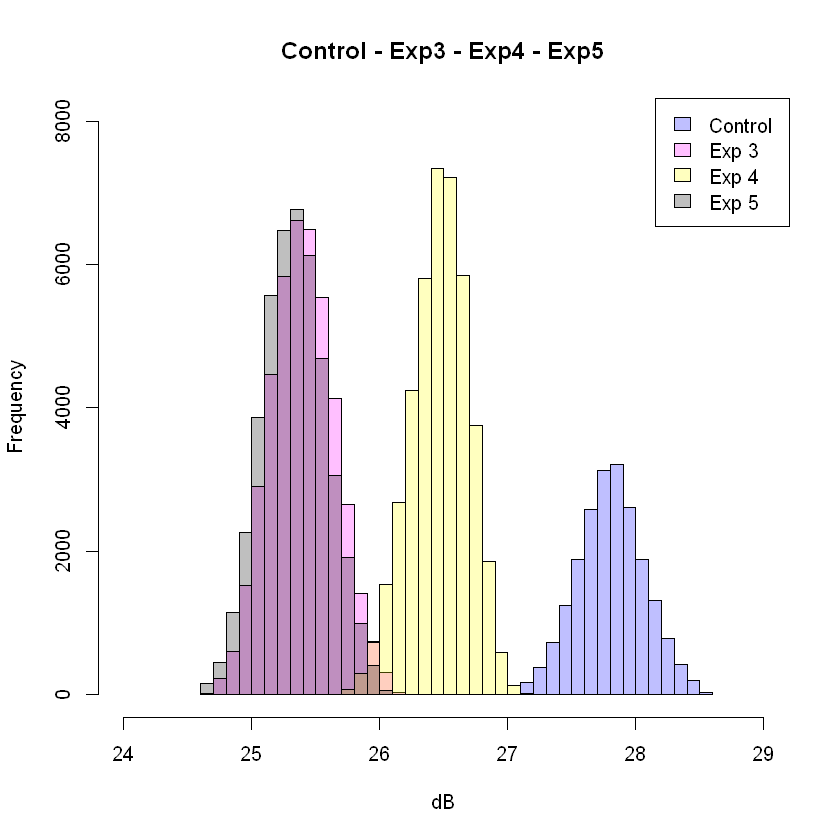

In [ ]:

# 1. Carga de datos

library(FSA)
library(psych)
library(knitr)
library(rcompanion)
library(ggplot2)

# Lectura de datos
Data <- read.csv("C:\\Users\\user\\PycharmProjects\\RCheatSheet\\Examen1\\Datos tarea 1.csv")

# Sumario
summ <- Summarize(Stpbnd.2400.2482..S21..1. ~ Lot, data=Data, digits = 2)

# Se calculan los rangos
ranges <- tapply(Data$Stpbnd.2400.2482..S21..1., Data$Lot, range)
summ$range <- ranges

# Para mostrar solo: tamaño de muestra, mínimo, máximo, rango, media, promedio y desviación estándar.
summ_organized <- summ[, c("Lot", "n", "min", "max", "range", "median", "mean", "sd")]
kable(summ_organized, align = "l", format = "markdown", row.names = FALSE, caption = "Summary")

# 2. Histogramas iniciales

Control <- Data$Stpbnd.2400.2482..S21..1.[Data$Lot == "Control"]
exp1 <- Data$Stpbnd.2400.2482..S21..1.[Data$Lot == "Exp 1"]
exp2 <- Data$Stpbnd.2400.2482..S21..1.[Data$Lot == "Exp 2"]
exp3 <- Data$Stpbnd.2400.2482..S21..1.[Data$Lot == "Exp 3"]
exp4 <- Data$Stpbnd.2400.2482..S21..1.[Data$Lot == "Exp 4"]
exp5 <- Data$Stpbnd.2400.2482..S21..1.[Data$Lot == "Exp 5"]

par(mfrow = c(3, 1))
plotNormalHistogram(Control, main="Control",  xlim = c(4, 56), lwd=0.5, xlab="dB")
plotNormalHistogram(exp1, main="Exp 1",  xlim = c(4, 56), lwd=0.5, xlab="dB")
plotNormalHistogram(exp2, main="Exp 2",  xlim = c(4, 56), lwd=0.5, xlab="dB")
par(mfrow = c(3, 1))
plotNormalHistogram(exp3, main="Exp 3",  xlim = c(4, 56), lwd=0.5, xlab="dB")
plotNormalHistogram(exp4, main="Exp 4",  xlim = c(4, 56), lwd=0.5, xlab="dB")
plotNormalHistogram(exp5, main="Exp 5",  xlim = c(4, 56), lwd=0.5, xlab="dB")

# 3. Eliminar outliers

# IQR
eliminate_outliers <- function(mydata) {
  quartiles <- quantile(mydata, probs=c(.25, .75), na.rm = FALSE)
  IQR <- IQR(mydata)
  Lower <- quartiles[1] - 1.5 * IQR
  Upper <- quartiles[2] + 1.5 * IQR
  clean_data <- subset(mydata, mydata > Lower & mydata < Upper)
  return (clean_data)
}

Control <- eliminate_outliers(Control)
exp1 <- eliminate_outliers(exp1)
exp2 <- eliminate_outliers(exp2)
exp3 <- eliminate_outliers(exp3)
exp4 <- eliminate_outliers(exp4)
exp5 <- eliminate_outliers(exp5)

par(mfrow = c(2, 1))
plotNormalHistogram(Control, main="Control",  xlim = c(24, 29), lwd=0.5, xlab="dB")
plotNormalHistogram(exp1, main="Exp 1",  xlim = c(24, 29), lwd=0.5, xlab="dB")
par(mfrow = c(2, 1))
plotNormalHistogram(exp2, main="Exp 2",  xlim = c(24, 29), lwd=0.5, xlab="dB")
plotNormalHistogram(exp3, main="Exp 3",  xlim = c(24, 29), lwd=0.5, xlab="dB")
par(mfrow = c(2, 1))
plotNormalHistogram(exp4, main="Exp 4",  xlim = c(24, 29), lwd=0.5, xlab="dB")
plotNormalHistogram(exp5, main="Exp 5",  xlim = c(24, 29), lwd=0.5, xlab="dB")

# 3. Histogramas de colores sobrepuestos

par(mfrow = c(1, 1))
p1 <- hist(Control)
p2 <- hist(exp1)
p3 <- hist(exp2)

plot( p1, col=rgb(0,0,1,1/4), xlim=c(24, 29), ylim=c(0, 8000), breaks = 30, xlab="dB",
     main = "Control - Exp1 - Exp2" )  # First histogram
plot( p2, col=rgb(1,0,0,1/4), breaks = 30, add=T) # Second histogram
plot( p3, col=rgb(0,1,0,1/4),  breaks = 30, add=T)  # Third histogram
legend("topright", c("Control", "Exp 1", "Exp 2"),
      fill = c(rgb(0,0,1,1/4),
               rgb(1,0,0,1/4),
               rgb(0,1,0,1/4)))

p4 <- hist(exp3)
p5 <- hist(exp4)
p6 <- hist(exp5)
plot( p1, col=rgb(0,0,1,1/4), xlim=c(24, 29), ylim=c(0, 8000), breaks = 30, xlab="dB",
       main = "Control - Exp3 - Exp4 - Exp5")  # first histogram
plot( p4, col=rgb(1, 0,1,1/4), breaks = 30, add=T)
plot( p5, col=rgb(1,1,0,1/4),  breaks = 30, add=T)
plot( p6, col=rgb(0,0,0,1/4),  breaks = 30, add=T)
legend("topright", c("Control", "Exp 3", "Exp 4", "Exp 5"),
       fill = c(rgb(0,0,1,1/4),
                rgb(1, 0,1,1/4),
                rgb(1,1,0,1/4),
                rgb(0,0,0,1/4)))


# 4. Gráfico de cajas y bigotes

# Para eliminar outliers "outline = 0".
boxplot(Stpbnd.2400.2482..S21..1. ~ Lot, data = Data, ylim = c(24, 30), ylab="Stopband (dB)")


# ---------------- PLAYGROUND -------------
# Promedios e intervalos de confianza

#  Stpbnd.2400.2482..S21..1. ~ Lot ||| data=Data,

Sum <- groupwiseMean(Stpbnd.2400.2482..S21..1. ~ Lot, data = Data, conf = 0.95, digits = 3, traditional = FALSE, percentile = TRUE)
Sum


# Gráficos de promedios e intervalos de confianza

library(ggplot2)
ggplot(Sum,
       aes(x = Lot, y = Mean)) +
       geom_errorbar(aes(ymin = Percentile.lower,
                         ymax = Percentile.upper),
                         width = 0.05, size = 0.5) +
                    geom_point(shape = 15,
                               size = 4) +
                    theme_bw() +
                    theme(axis.title = element_text(face = "bold")) +
                    ylab("Tiempo promedio, s")


model <- lm(Stpbnd.2400.2482..S21..1. ~ Lot, data = Data)
summary(model)


X <- residuals(model)
library(rcompanion)
plotNormalHistogram(X)

plot(fitted(model),residuals(model))

plot(model)


library(car)
Anova(model, type = "II")


library(multcompView)
library(lsmeans)
marginal <- lsmeans(model, ~ Lot)
pairs(marginal, adjust="tukey", alpha = 0.001)

library(multcomp)
CLD <- cld(marginal, alpha=0.001, Letters = letters, adjust = "tukey")
CLD
